# DESAFIO 4 - MACHINE LEARNING - DATA SCIENCE - DESAFIO LATAM

In [181]:
# Importamos librerias necesarias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [182]:
# Define la ruta del archivo
ruta_archivo = "data/ramen-ratings.xlsx"

# Cargar el archivo en un DataFrame
df = pd.read_excel(ruta_archivo)

# Mostrar las primeras filas del DataFrame
print(df.shape)
df.head()

(2580, 7)


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [183]:
# Descripción de los datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Review #,2580.0,1290.5,744.926171,1.0,645.75,1290.5,1935.25,2580.0


In [184]:
# Información de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [185]:
# Evaluamos nulos
df.isnull().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

In [186]:
# Evaluamos la columna 'Top Ten'
df['Top Ten'].value_counts()

Top Ten
\n          4
2016 #10    1
2012 #10    1
2014 #1     1
2013 #1     1
2013 #2     1
2013 #4     1
2013 #9     1
2013 #3     1
2012 #7     1
2016 #1     1
2012 #5     1
2012 #3     1
2012 #6     1
2012 #9     1
2012 #1     1
2012 #2     1
2013 #6     1
2014 #6     1
2014 #5     1
2014 #8     1
2014 #10    1
2016 #8     1
2016 #5     1
2016 #9     1
2016 #7     1
2015 #10    1
2015 #7     1
2015 #4     1
2015 #9     1
2015 #6     1
2015 #1     1
2013 #10    1
2015 #8     1
2014 #7     1
2014 #4     1
2014 #9     1
2012 #4     1
Name: count, dtype: int64

In [187]:
# Evaluamos los valores de 'Stars'
df['Stars'].value_counts()

Stars
4          393
5          386
3.75       350
3.5        335
3          176
3.25       170
4.25       143
4.5        135
2.75        85
2           68
2.5         67
4.75        64
1.5         37
1.75        27
0           26
1           26
2.25        21
0.5         14
0.25        11
1.25        10
4.3          4
Unrated      3
3.8          3
3.1          2
2.8          2
2.9          2
4.125        2
2.3          2
1.1          2
0.9          1
2.1          1
3.125        1
2.125        1
0.75         1
0.1          1
3.3          1
3.7          1
3.4          1
3.6          1
2.85         1
3.2          1
3.65         1
1.8          1
Name: count, dtype: int64

### ANALISIS DE CALIDAD DE LOS DATOS

In [203]:
# Realizamos una función de análisis de datos
def data_quality_analysis(df):
    # Crear un nuevo dataframe para almacenar los resultados
    result_df = pd.DataFrame(columns=['Columna', 'Tipo de dato', 'Valores únicos', 'Valores faltantes'])
    
    # Obtener información general del dataframe
    columns = df.columns
    data_types = df.dtypes.to_list()
    unique_values = [df[column].nunique() for column in columns]
    missing_values = [df[column].isnull().sum() for column in columns]
    
    # Llenar el nuevo dataframe con los resultados
    result_df['Columna'] = columns
    result_df['Tipo de dato'] = data_types
    result_df['Valores únicos'] = unique_values
    result_df['Valores faltantes'] = missing_values
    
    return result_df

# Uso de la función con el dataframe 'df'
analysis_result = data_quality_analysis(df).set_index('Columna')
print(analysis_result)

          Tipo de dato  Valores únicos  Valores faltantes
Columna                                                  
Review #         int64            2580                  0
Brand           object               8                  0
Variety         object            2412                  0
Style           object               8                  0
Country         object               8                  0
Stars          float64              42                  3
Top Ten         object              38               2539
Stars_cat        int64               2                  0


In [189]:
df[df['Stars'] == 'Unrated']

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,Unrated,NaN
122,2458,Samyang Foods,Sari Ramen,Pack,South Korea,Unrated,NaN
993,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,Unrated,NaN


In [190]:
df['Stars'] = np.where(df['Stars'] == 'Unrated', np.nan, df['Stars'])


In [191]:
df['Stars'] = df['Stars'].astype('float')

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  2580 non-null   int64  
 1   Brand     2580 non-null   object 
 2   Variety   2580 non-null   object 
 3   Style     2578 non-null   object 
 4   Country   2580 non-null   object 
 5   Stars     2577 non-null   float64
 6   Top Ten   41 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 141.2+ KB


In [193]:
df.columns

Index(['Review #', 'Brand', 'Variety', 'Style', 'Country', 'Stars', 'Top Ten'], dtype='object')

### ANALISIS EXPLORATORIO

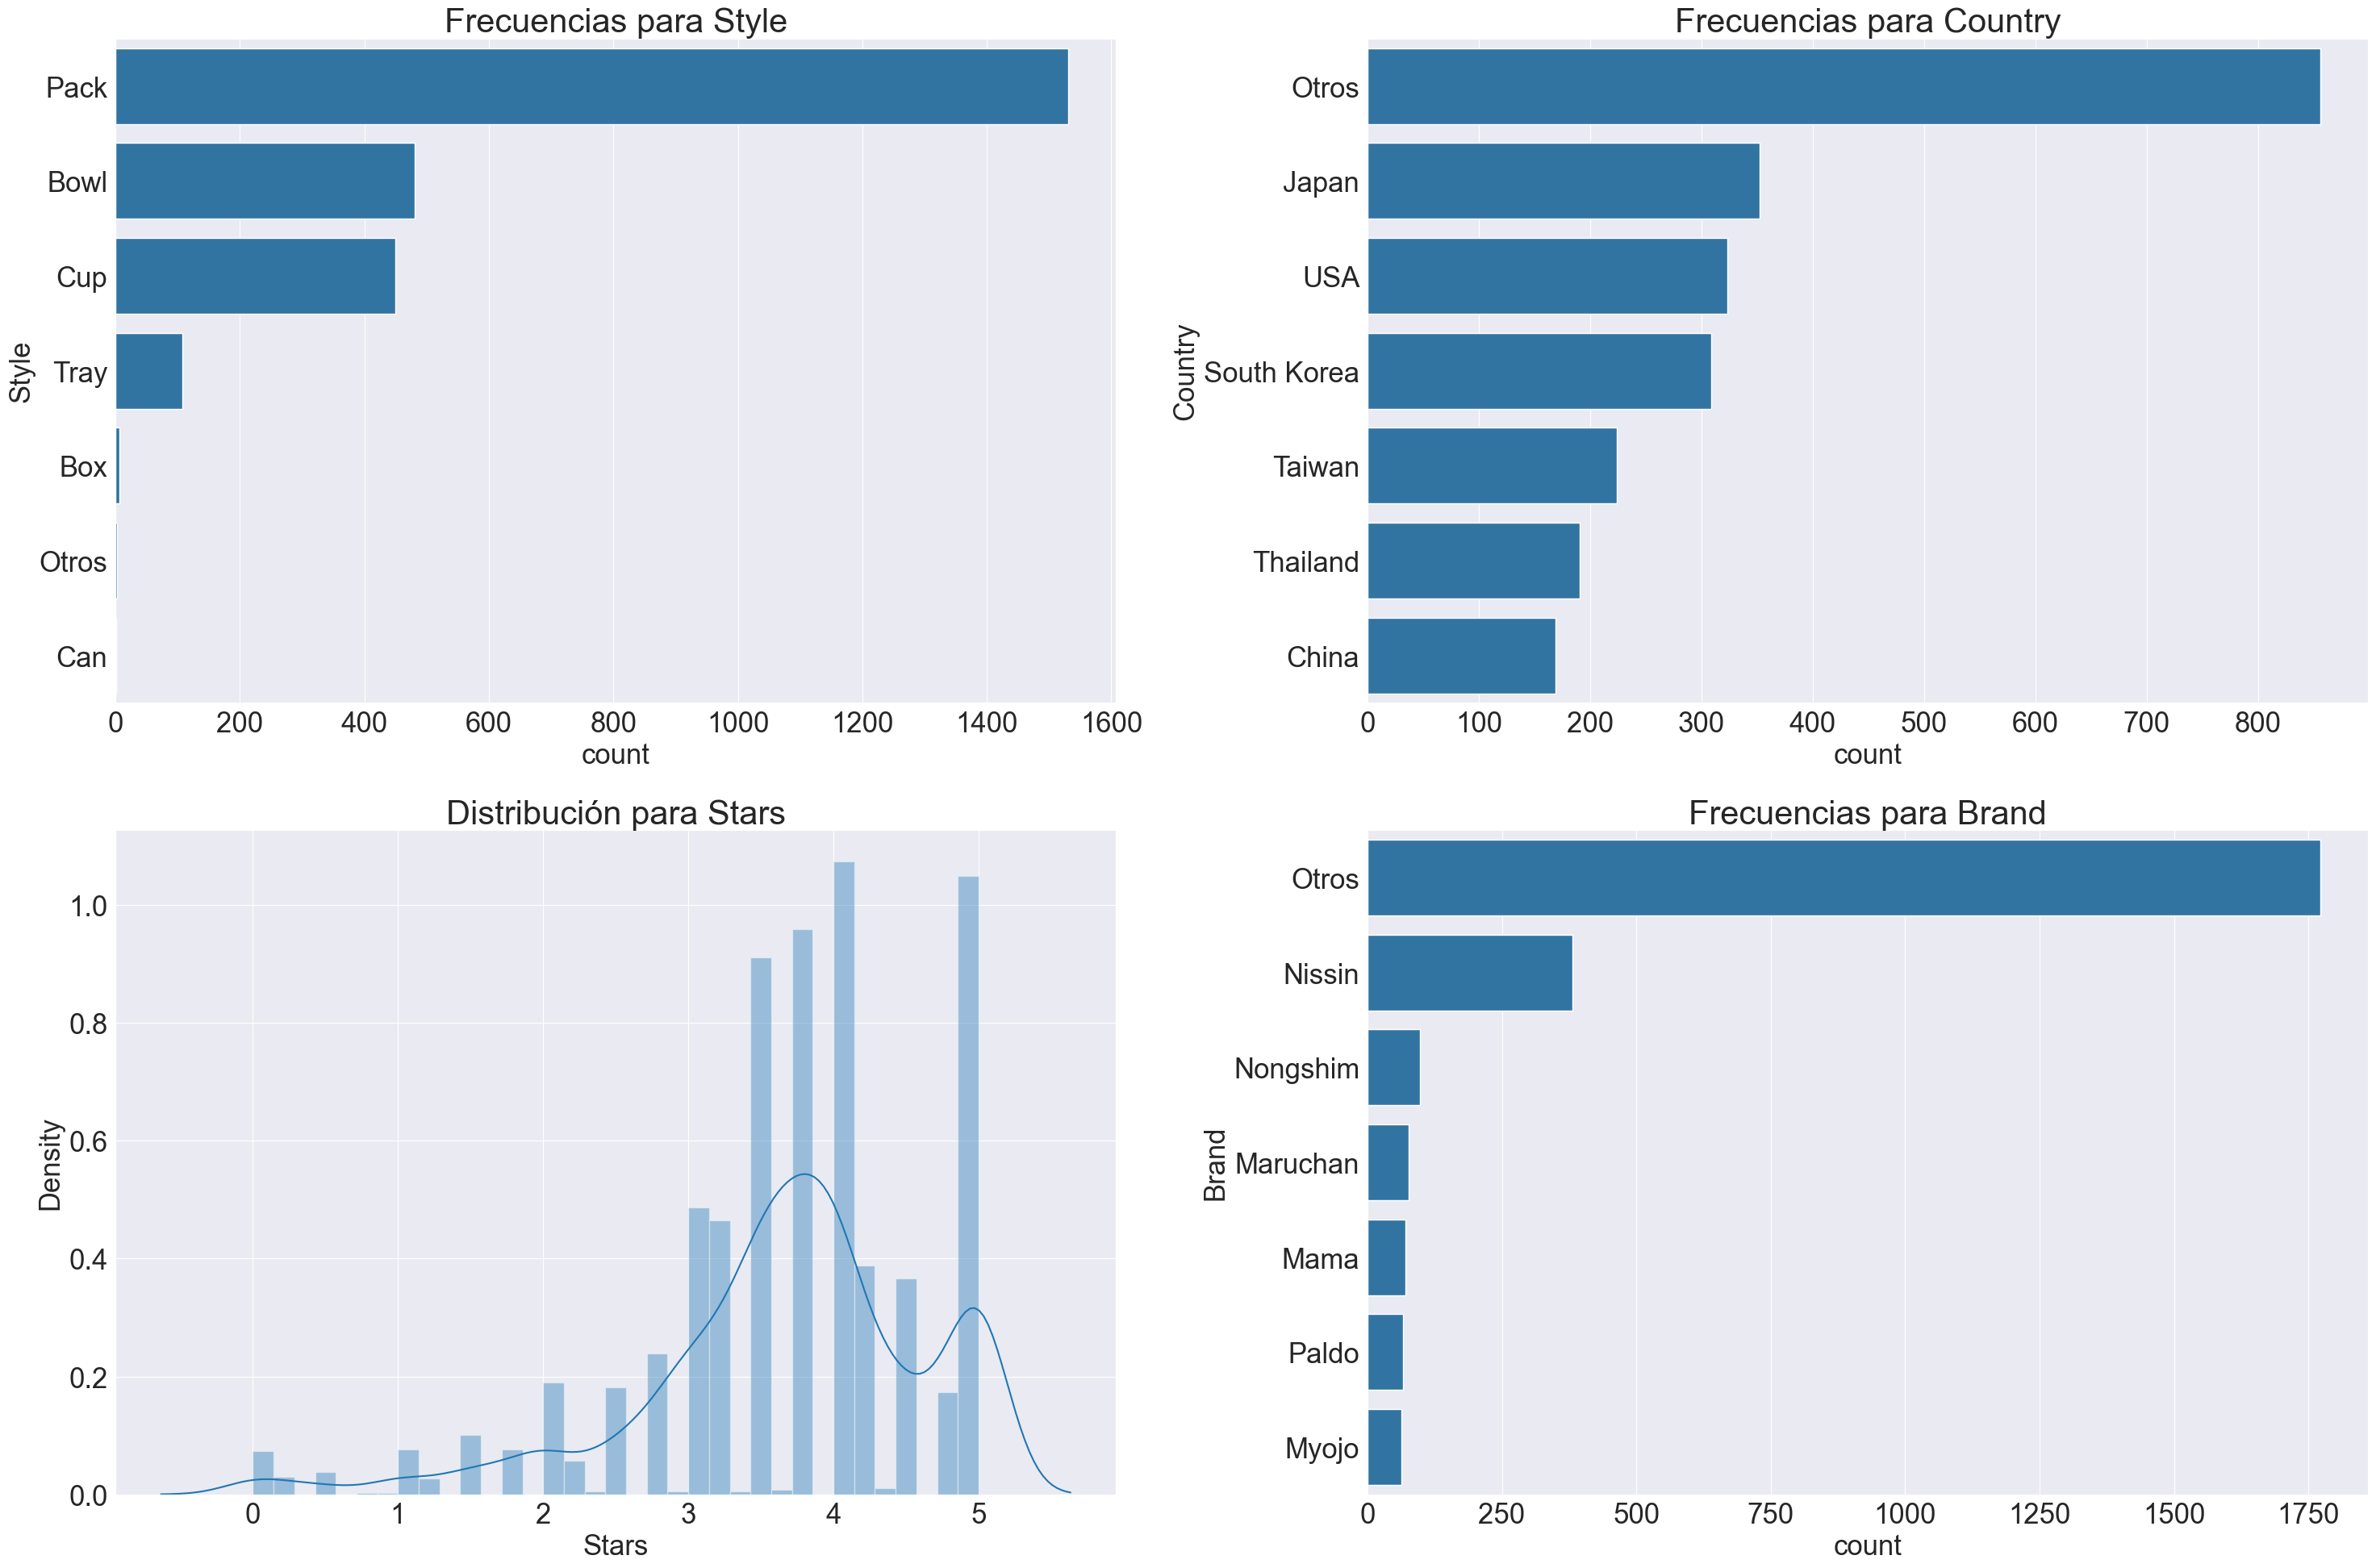

In [204]:
# Definimos las columnas a analizar y ajustamos el tamaño de la fuente en las gráficas
list_cols = ['Style', 'Country', 'Stars', 'Brand']
plt.rcParams.update({'font.size': 25})  # Cambiamos el tamaño de fuente global para las gráficas

# Configuramos el tamaño del lienzo donde se graficarán las subgráficas
plt.figure(figsize=(30, 20))

# Iteramos sobre cada columna en la lista list_cols
for n, i in enumerate(list_cols):
    # Creamos subgráficos organizados en una cuadrícula de 2x2
    plt.subplot(2, 2, n + 1)
    
    # Verificamos si el tipo de dato de la columna actual es categórico ('object')
    if analysis_result.loc[i, 'Tipo de dato'] =='object':
        # Si es categórico, graficamos un countplot con las frecuencias de las 7 categorías más comunes
        sns.countplot(y=df[i], order=df[i].value_counts().iloc[:7].index)
        # Agregamos un título indicando la columna analizada
        plt.title('Frecuencias para {}'.format(i))
        
    else:
        # Si la columna es numérica, graficamos un histograma con la densidad de los datos
        sns.distplot(df[i])
        # Agregamos un título indicando la columna analizada
        plt.title('Distribución para {}'.format(i))
    
    # Ajustamos automáticamente los gráficos para evitar solapamientos
    plt.tight_layout()


In [195]:
# Agrupar categorías pequeñas
for i in ['Style', 'Country','Brand']:
    df[i] = np.where(df[i].isin(df[i].value_counts().iloc[:7].index), df[i], 'Otros')

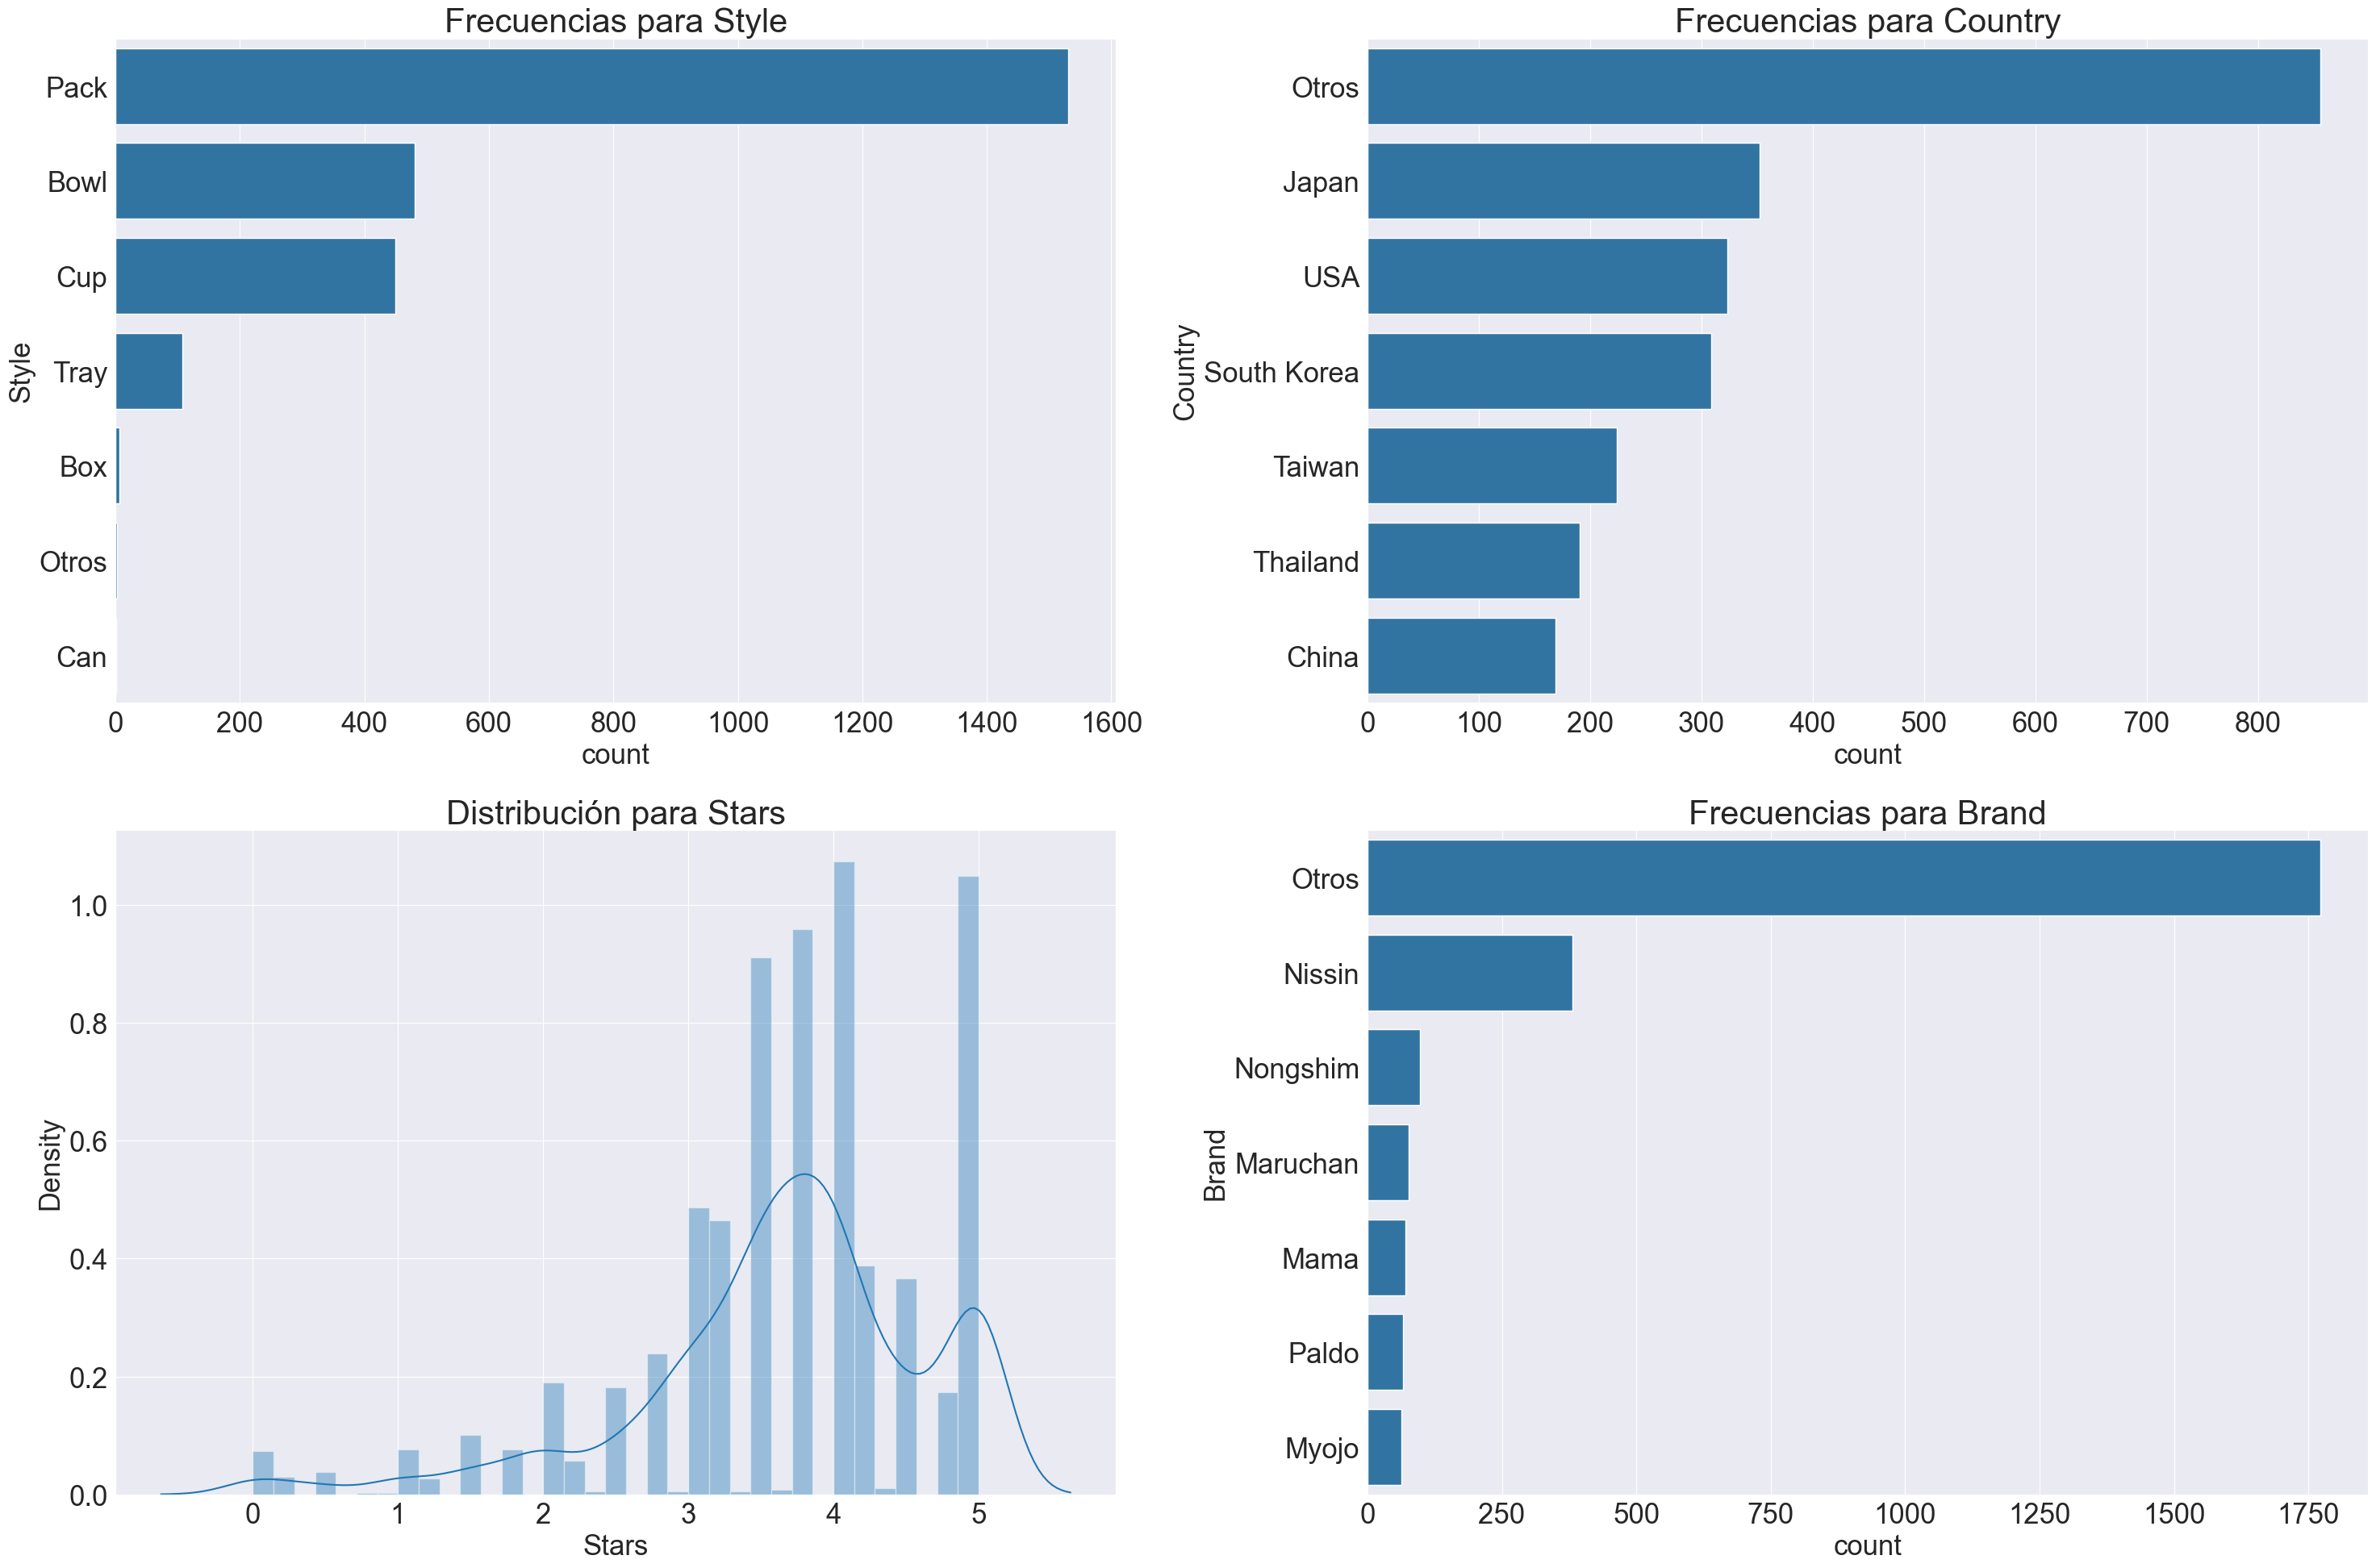

In [205]:
# Configuramos el tamaño del lienzo donde se graficarán las subgráficas
plt.figure(figsize=(30, 20))

# Iteramos sobre cada columna en la lista list_cols
for n, i in enumerate(list_cols):
    # Creamos subgráficos organizados en una cuadrícula de 2x2
    plt.subplot(2, 2, n + 1)
    
    # Verificamos si el tipo de dato de la columna actual es categórico ('object')
    if analysis_result.loc[i, 'Tipo de dato'] =='object':
        # Si es categórico, graficamos un countplot con las frecuencias de las 7 categorías más comunes
        sns.countplot(y=df[i], order=df[i].value_counts().iloc[:7].index)
        # Agregamos un título indicando la columna analizada
        plt.title('Frecuencias para {}'.format(i))
        
    else:
        # Si la columna es numérica, graficamos un histograma con la densidad de los datos
        sns.distplot(df[i])
        # Agregamos un título indicando la columna analizada
        plt.title('Distribución para {}'.format(i))
    
    # Ajustamos automáticamente los gráficos para evitar solapamientos
    plt.tight_layout()

In [206]:
# Categorizar variable objetivo
print(df['Stars'].mean())
df['Stars_cat'] = np.where(df['Stars'] > df['Stars'].mean(), 1, 0)

3.6546759798214974


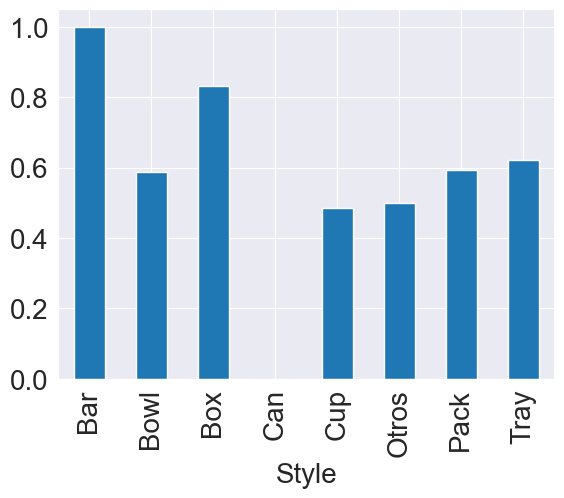

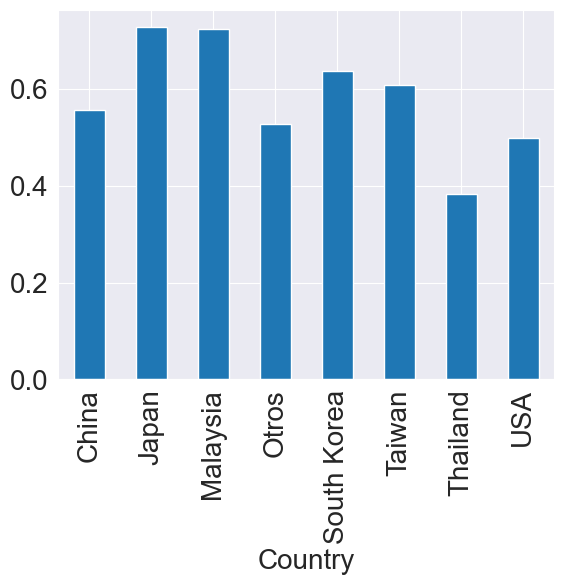

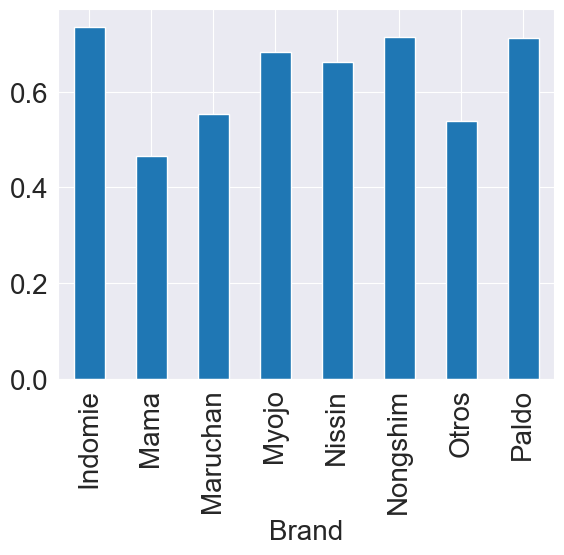

In [207]:
plt.rcParams.update({'font.size': 20})

for i in ['Style', 'Country','Brand']:
    dfi = df.groupby(i).Stars_cat.mean()
    dfi.plot(kind='bar')
    plt.show()

# TRANSFORMACION DE VARIABLES

In [208]:
# Aplicamos get_dummies
df_transform = pd.get_dummies(df.loc[:, ['Brand', 'Style', 'Country', 'Stars_cat']]).astype('int')
df_transform

,Stars_cat,Brand_Indomie,Brand_Mama,Brand_Maruchan,Brand_Myojo,Brand_Nissin,Brand_Nongshim,Brand_Otros,Brand_Paldo,Style_Bar,...,Style_Pack,Style_Tray,Country_China,Country_Japan,Country_Malaysia,Country_Otros,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2576,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2577,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2578,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


# DIVISION Y ENTRENAMIENTO

In [209]:
# Division de datos entre entrenamiento y prueba
X = df_transform.drop('Stars_cat', axis=1)
y = df_transform['Stars_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [210]:
#Escalado de caracteristicas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# REGRESION LOGISTICA

In [211]:
logistic_model=LogisticRegression()

param_grid_logistic = {'C': [0.1, 1, 10]}
grid_search_logistic = GridSearchCV(logistic_model, param_grid_logistic, cv=5)
grid_search_logistic.fit(X_train_scaled, y_train)
best_logistic_model = grid_search_logistic.best_estimator_

grid_search_logistic.best_params_


{'C': 0.1}

# SUPPORT VECTOR MACHINE (SVM)

In [213]:
%%time
svm_model= SVC(probability=True)

param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, verbose= 2)
grid_search_svm.fit(X_train_scaled, y_train)
best_svm_model = grid_search_svm.best_estimator_

grid_search_svm.best_params_


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.2s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.2s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.1

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

# EVALUACION DE MODELOS

In [215]:
# Regresión Logística
y_pred_logistic = best_logistic_model.predict(X_test_scaled)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_score_logistic = f1_score(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, best_logistic_model.predict_proba(X_test_scaled)[:,1])

print('Regresión Logística')
print('Acurracy:',accuracy_logistic)
print('Precision:', precision_logistic)
print('Recall:', recall_logistic)
print('F1 Score:', f1_score_logistic)
print('ROC AUC:', roc_auc_logistic)


Regresión Logística
Acurracy: 0.624031007751938
Precision: 0.6519480519480519
Recall: 0.8070739549839229
F1 Score: 0.7212643678160919
ROC AUC: 0.6098502078268371


<Axes: xlabel='col_0', ylabel='Stars_cat'>

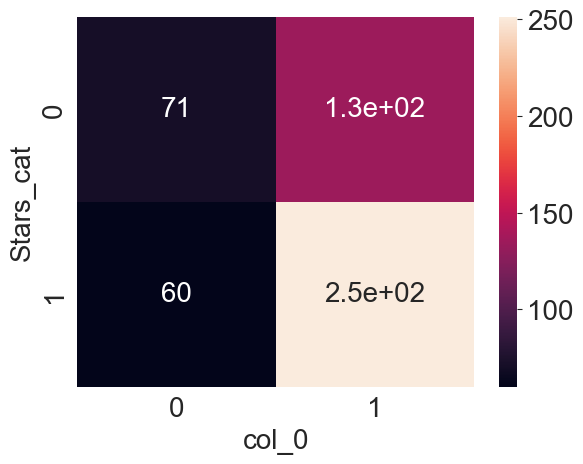

In [216]:
sns.heatmap(pd.crosstab(y_test, y_pred_logistic), annot=True)

In [217]:
# Support Vector Machine (SVM)
y_pred_svm = best_svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_score_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, best_svm_model.predict_proba(X_test_scaled)[:,1])

print('Support Vector Machine (SVM)')
print('Acurracy:',accuracy_svm)
print('Precision:', precision_svm)
print('Recall:', recall_svm)
print('F1 Score:', f1_score_svm)
print('ROC AUC:', roc_auc_svm)

Support Vector Machine (SVM)
Acurracy: 0.5949612403100775
Precision: 0.660377358490566
Recall: 0.6752411575562701
F1 Score: 0.6677265500794912
ROC AUC: 0.6177711552035134


<Axes: xlabel='col_0', ylabel='Stars_cat'>

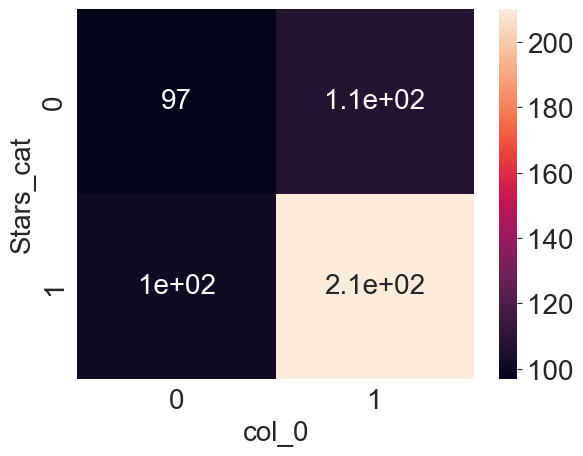

In [218]:
sns.heatmap(pd.crosstab(y_test, y_pred_svm), annot=True)